<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Trabajo Práctico 2

#### Por Grupo 2


### Ejercicio 1

El siguiente filtro pasabajos debe presentar una respuesta Butterworth con un ancho de banda de -3dB a 1KHz. Determinar el valor de L y C sabiendo que la carga es de 1 KΩ. Verificar las especificaciones del filtro mediante el uso de simuladores.

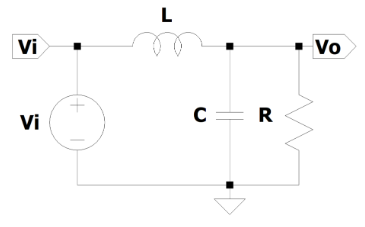

Sugerencia: diseñar el filtro con valores normalizados en frecuencia e impedancia y luego desnormalizar para calcular el valor del filtro pedido




* Debido a que el filtro es un Butter => -3dB => $\epsilon$ = 1 <br> $Wc = 2\pi f = 6,2k$

* Definimos el paralelo $Z_1 = C//R$ = $\frac{R}{\$RC + 1}$

* $T(\$) =\frac{Z_1}{\$L + Z_1}= \frac{R}{\$^2CLR+\$L+R} = \frac{\frac{1}{CL}}{\$^2+\$\frac{1}{RC}+\frac{1}{LC}}$ 
<br>
$W_o^2 = \frac{1}{LC} => L = \frac{1}{W_o^2C}$<br>
$\frac{W_O}{Q} = \frac{1}{RC} => C=\frac{Q}{W_oR}$
<br><br>
Al ser de orden 2 y Butter los Polos estan a 45° => $Q = \frac{\sqrt{2}}{2}$
* Simulacion de circuito normalizado:





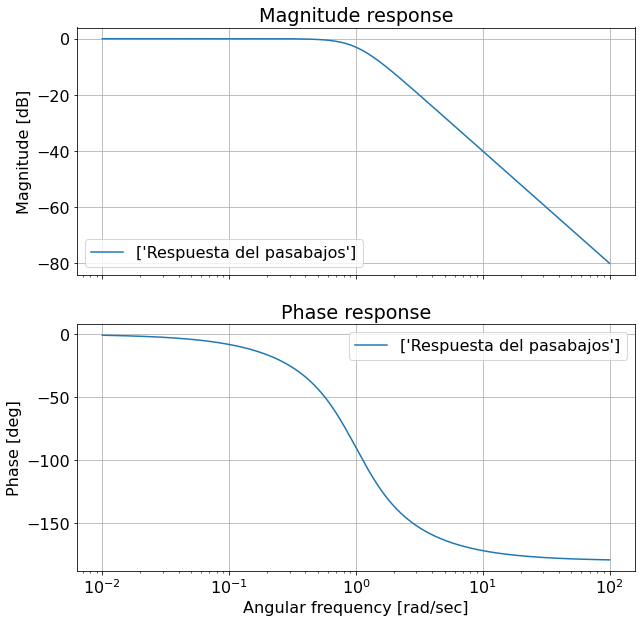

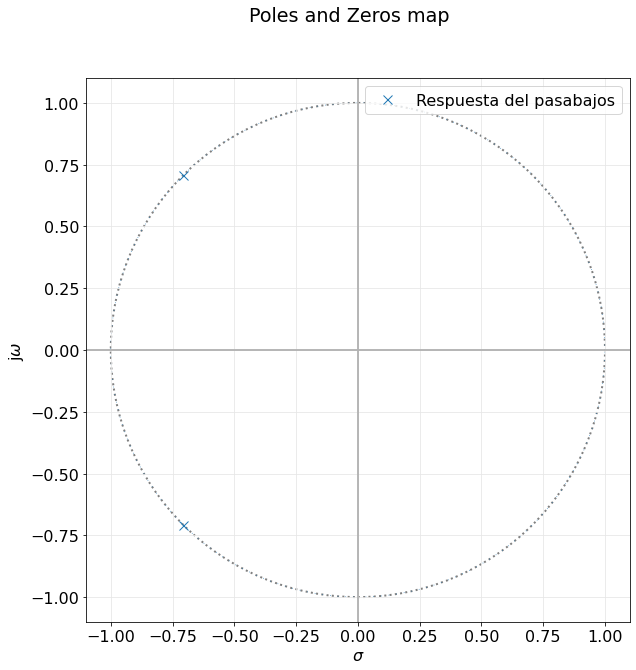

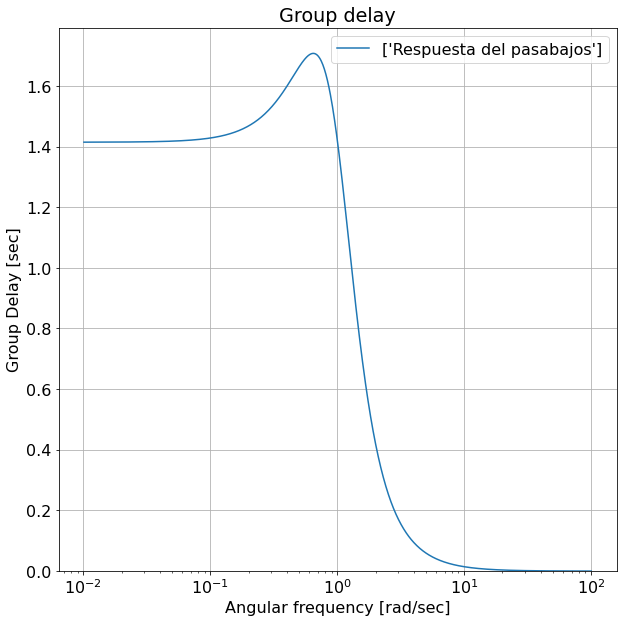

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq
mpl.rcParams['figure.figsize'] = (10,10)

num = np.array([1]) 
den = np.array([1,2/np.sqrt(2),1])
tsf = sig.TransferFunction(num,den)
plt.close('all')
analyze_sys(tsf, 'Respuesta del pasabajos')

* Reemplazamos los valores para sacar el valor de C y L

$C =\frac{Q}{W_oR}= \frac{\frac{\sqrt{2}}{2}}{6280.1000}=112nF$ <br>
$L = \frac{1}{W_oC}=\frac{1}{{6280}^2.112nF}=225mHy$

### Ejercicio 3

![Consigna](EJ3/Consigna.png "Consigna")

#### Obtención orden filtro

![Orden](EJ3/Desarrollo/1.jpg "Orden")

#### Obtención transferencia

![Transferencia](EJ3/Desarrollo/2.jpg "Transferencia")

#### Sintentización del filtro utilizando KHN / Variable de estado

![KHN](EJ3/Desarrollo/3.jpg "KHN")

![KHN](EJ3/Desarrollo/4.jpg "KHN")

#### Normalización y obtención de valores

![KHN](EJ3/Desarrollo/5.jpg "KHN")

![KHN](EJ3/Desarrollo/6.jpg "KHN")

#### Simulación numérica

In [24]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

[1.         0.23869587 1.05367286]
[1.         0.62491389 0.49465587]
[1.         0.38621803]


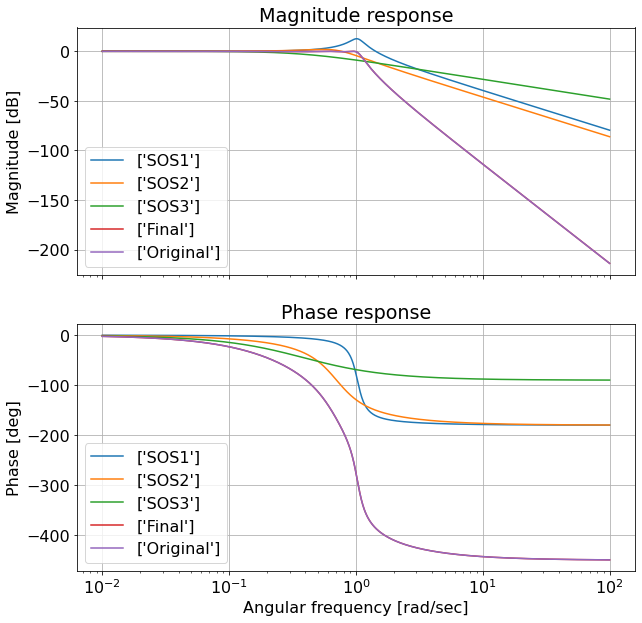

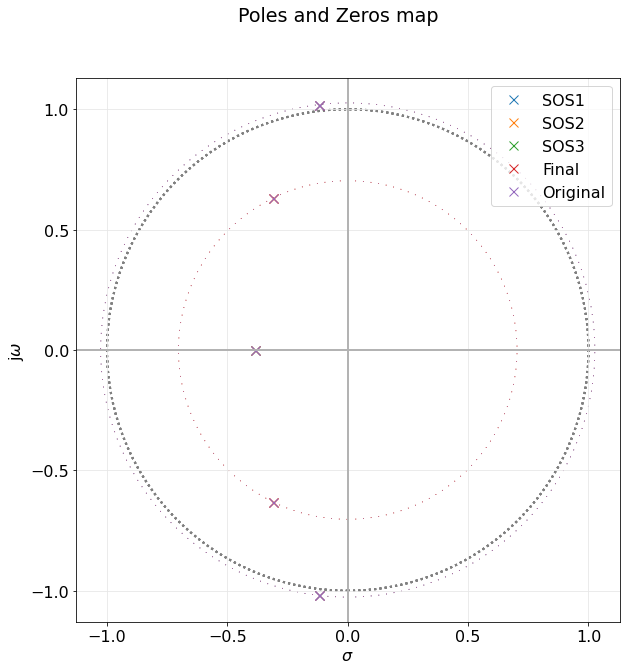

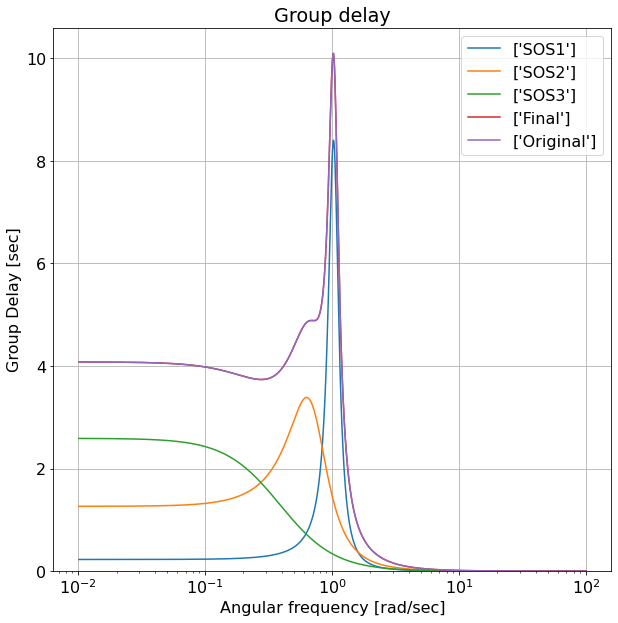

In [48]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
c5_cheby = np.array([16, 0, -20, 0, 5, 0])
c5_cheby_2 = np.polymul(c5_cheby,c5_cheby) # Genero polinomio de Cheby al cuadrado para obtener coeficientes
psi2 = 0.0964

den_ts2 = np.array([-256, 0, -640, 0, -560, 0, -200, 0, -25, 0, 0]) # Polinomio obtenido con polymul
den_ts2_psi = psi2 * den_ts2 # Multiplico polinomio de Cheby por psi
den_ts2_psi[len(den_ts2_psi) - 1] += 1 # Sumo 1 al último termino
#print(den_ts2_psi)
# Busco coeficientes T(s) a partir de polos
polos = np.roots(den_ts2_psi)
polos_ts = np.array([polos[2], polos[3], polos[6], polos[7], polos[8]])
coeficientes_ts = np.sqrt(psi2*256) * np.poly(polos_ts)
#print(polos_ts)

# Reconstruyo en dos SOS y una FOS (First Order)
polos_ts1 = np.array([polos[2], polos[3]])
polos_ts2 = np.array([polos[6], polos[7]])
polos_ts3 = np.array([polos[8]])
coeficientes_ts1 = np.poly(polos_ts1)
coeficientes_ts2 = np.poly(polos_ts2)
coeficientes_ts3 = np.poly(polos_ts3)
print(coeficientes_ts1)
print(coeficientes_ts2)
print(coeficientes_ts3)

sos_1 = sig.TransferFunction([1.053],coeficientes_ts1)
sos_2 = sig.TransferFunction([0.494],coeficientes_ts2)
sos_3 = sig.TransferFunction([0.389],coeficientes_ts3)
den_ts_rec = np.polymul(coeficientes_ts1,coeficientes_ts2)
den_ts_rec = np.polymul(den_ts_rec,coeficientes_ts3)
num_ts_rec = np.array([1.053*0.494*0.389])
sos_total = sig.TransferFunction(num_ts_rec,den_ts_rec)
sos_total_original = sig.TransferFunction([1],coeficientes_ts)

all_sos = [sos_1,sos_2,sos_3,sos_total,sos_total_original]

#pretty_print_bicuad_omegayq(num1,den1)
#pretty_print_bicuad_omegayq(num2,den2)
#pretty_print_bicuad_omegayq(num3,den3)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1','SOS2','SOS3','Final','Original'])

#### Simulación en SPICE

##### Circuito simulado parametrizado

![Circuito](EJ3/Simulaciones/Circuito.png "Circuito")

##### Atenuación

![Atenuacion](EJ3/Simulaciones/Atenuacion.png "Atenuacion")

Vemos que el circuito logra superar los 48dB pedidos para frecuencias mayores a 9.6KHz

##### Ripple en banda de paso

![Ripple](EJ3/Simulaciones/Ripple.png "Ripple")

Vemos que el circuito está muy cerca de lograr la atenuación máxima pedida en la banda de paso, con una diferencia de 0.154dB

### Ejercicio 4

![Punto 1](EJ4/Desarrollo/1_1.jpg "Punto 1 1")

![Punto 1](EJ4/Desarrollo/1_2.jpg "Punto 1 2")

#### Punto 2

![Punto 2](EJ4/Desarrollo/2_1.jpg "Punto 2 1")

![Punto 2](EJ4/Desarrollo/2_2.jpg "Punto 2 2")

#### Punto 3

![Punto 3](EJ4/Desarrollo/3_1.jpg "Punto 3 1")

#### Punto 4

![Punto 4](EJ4/Desarrollo/4_1.jpg "Punto 4 1")

![Punto 4](EJ4/Desarrollo/4_2.jpg "Punto 4 2")

#### Simulación

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

<IPython.core.display.Math object>

<IPython.core.display.Math object>

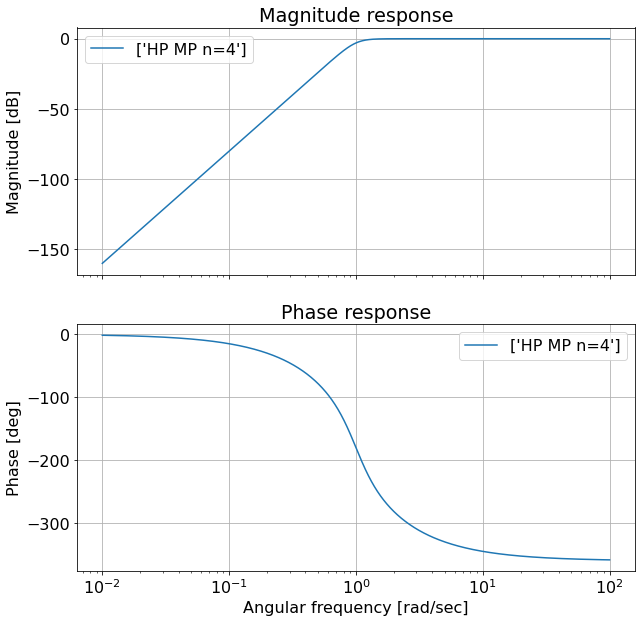

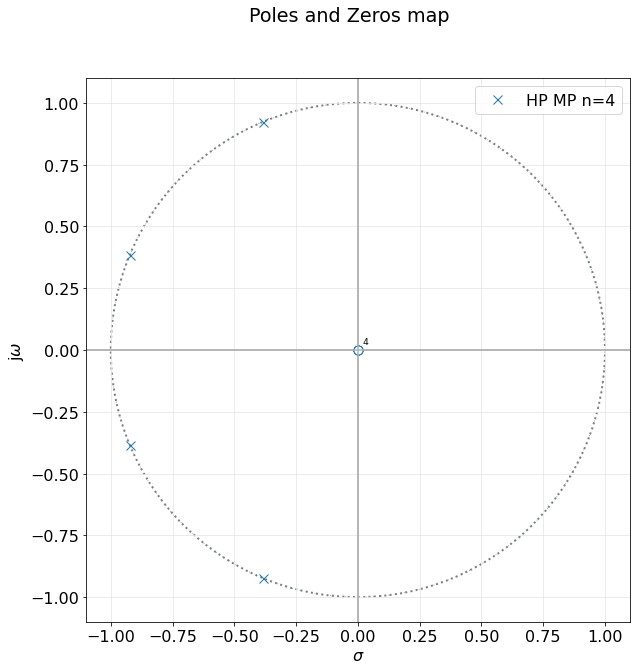

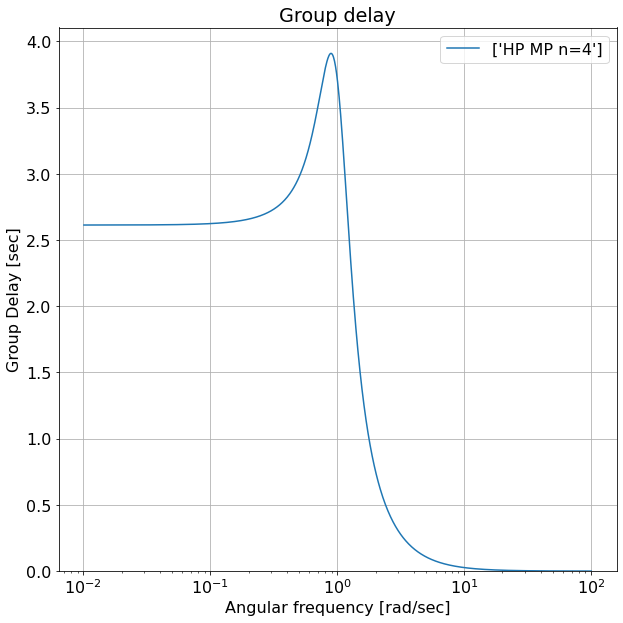

In [13]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
R1 = 1
C1 = 0.9
L1 = 1.548
R2 = 1
C2 = 2.188
L2 = 0.641

num1 = np.array([1])
den1 = np.array([1, 0.7654, 1])
num2 = np.array([1])
den2 = np.array([1, 1.8478, 1])

num3 = np.array([1, 0, 0, 0, 0])
den3 = np.array([1, 2.6131259, 3.4142136, 2.6131259, 1])

hp_max_plani = sig.TransferFunction(num3, den3)

pretty_print_bicuad_omegayq(num1,den1)
pretty_print_bicuad_omegayq(num2,den2)

plt.close('all')
analyze_sys(hp_max_plani, 'HP MP n=4')



#### Simulaciones en Spice

##### Simulación circuito normalizado

![Circuito Normalizado](EJ4/Simulaciones/Circuito_Normalizado.png "Circuito Normalizado")

![Simulacion Normalizado](EJ4/Simulaciones/Simulacion_Normalizado.png "Simulacion Normalizado")

##### Simulación circuito desnormalizado

![Circuito Desnormalizado](EJ4/Simulaciones/Circuito_Desnormalizado.png "Circuito Desnormalizado")

![Simulacion Desnormalizado](EJ4/Simulaciones/Simulacion_Desnormalizado.png "Simulacion Desnormalizado")

##### Simulación circuito con GIC para bobinas

![Circuito con GIC](EJ4/Simulaciones/Circuito_GIC.png "Circuito GIC")

![Simulacion GIC](EJ4/Simulaciones/Simulacion_GIC.png "Simulacion GIC")

### Ejercicio 6

![Consigna](EJ6/Consigna.png "Consigna")

#### Obtención orden filtro

![Orden](EJ6/Desarrollo/1.jpg "Orden")

#### Obtención transferencia

![Transferencia](EJ6/Desarrollo/2.jpg "Transferencia")

#### Sintentización del filtro utilizando MFB

![MFB](EJ6/Desarrollo/3.jpg "MFB")

#### Normalización y obtención de valores

![MFB](EJ6/Desarrollo/4.jpg "MFB")

#### Simulación numérica

In [6]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

In [16]:
den3 = np.array([1, 10, 45, 105, 105])
polos = np.roots(den3)
p12 = [polos[0], polos[1]]
p34 = [polos[2], polos[3]]
print(p12)
print(p34)
den_div1=np.poly(p12)
den_div2=np.poly(p34)
print(den_div1)
print(den_div2)

[(-2.1037893971796273+2.657418041856752j), (-2.1037893971796273-2.657418041856752j)]
[(-2.896210602820368+0.8672341289345109j), (-2.896210602820368-0.8672341289345109j)]
[ 1.          4.20757879 11.48780048]
[1.         5.79242121 9.14013089]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

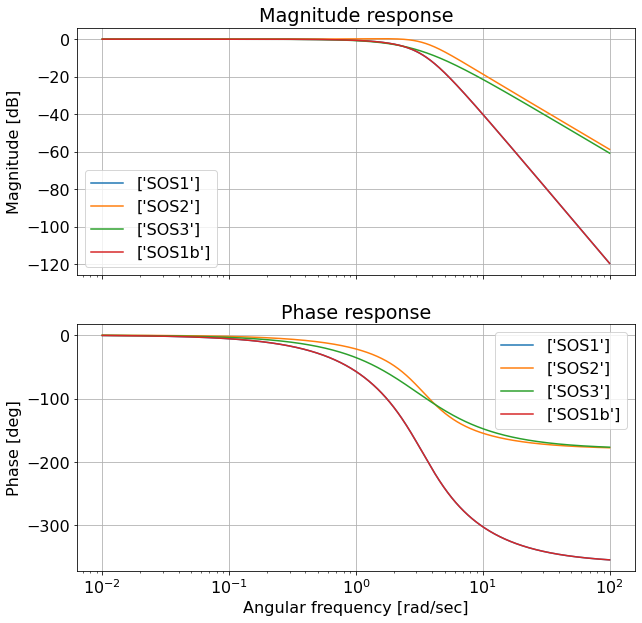

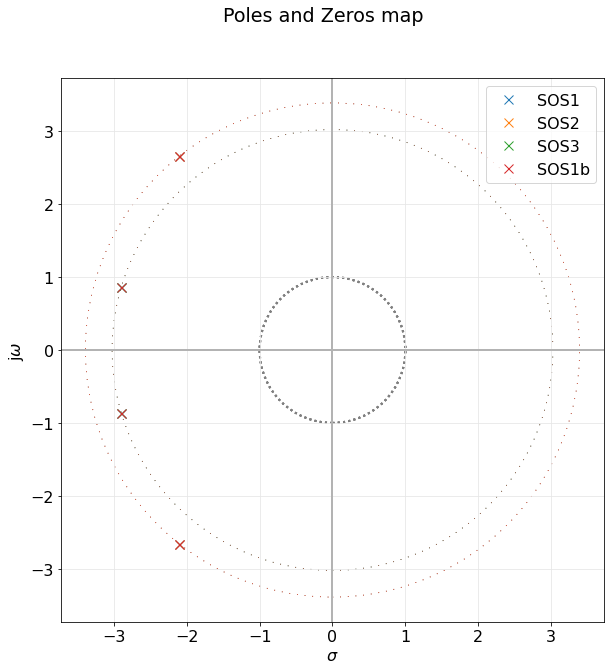

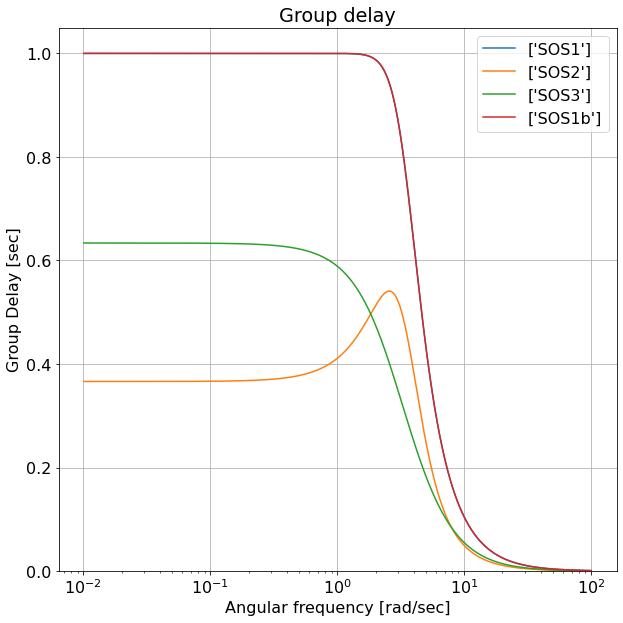

In [23]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
num1 = np.array([105])
den1 = np.array([1, 10, 45, 105, 105])
num2 = np.array([11.487])
den2 = np.array([1, 4.207, 11.487])
num3 = np.array([9.14])
den3 = np.array([1, 5.792, 9.14])

num1_aux = np.polymul(num2,num3)
den1_aux = np.polymul(den2,den3)

sos_1 = sig.TransferFunction(num1,den1)
sos_2 = sig.TransferFunction(num2,den2)
sos_3 = sig.TransferFunction(num3,den3)
sos_1_aux = sig.TransferFunction(num1_aux,den1_aux)

all_sos = [sos_1, sos_2, sos_3, sos_1_aux]

#pretty_print_bicuad_omegayq(num1,den1)
pretty_print_bicuad_omegayq(num2,den2)
pretty_print_bicuad_omegayq(num3,den3)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1','SOS2','SOS3','SOS1b'])

### Ejercicio 8

![Consigna](EJ8/Consigna.png "Consigna")

#### Obtención orden filtro

![Orden](EJ8/Desarrollo/1.jpg "Orden")

#### Obtención transferencia

![Transferencia](EJ8/Desarrollo/2.jpg "Transferencia")

#### Conversión de la plantilla a pasa-altos

![Pasaaltos](EJ8/Desarrollo/3.jpg "Pasaaltos")

#### Implementación con OTAs

![OTAs](EJ8/Desarrollo/4.jpg "OTAs")

#### Normalización y obtención de valores

![OTAs](EJ8/Desarrollo/5.jpg "OTAs")

![OTAs](EJ8/Desarrollo/6.jpg "OTAs")

#### Simulación numérica

In [3]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

<IPython.core.display.Math object>

<IPython.core.display.Math object>

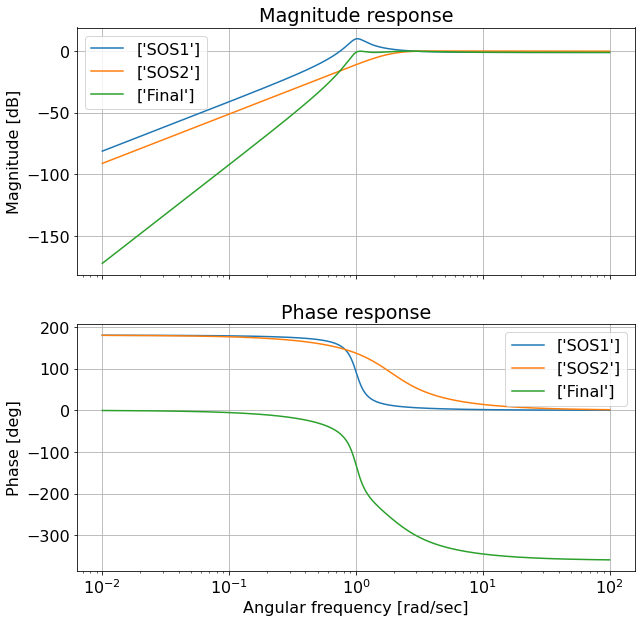

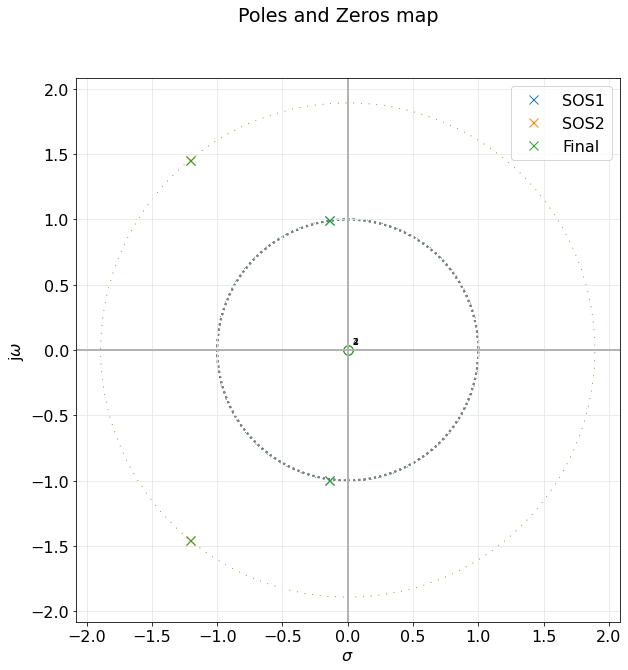

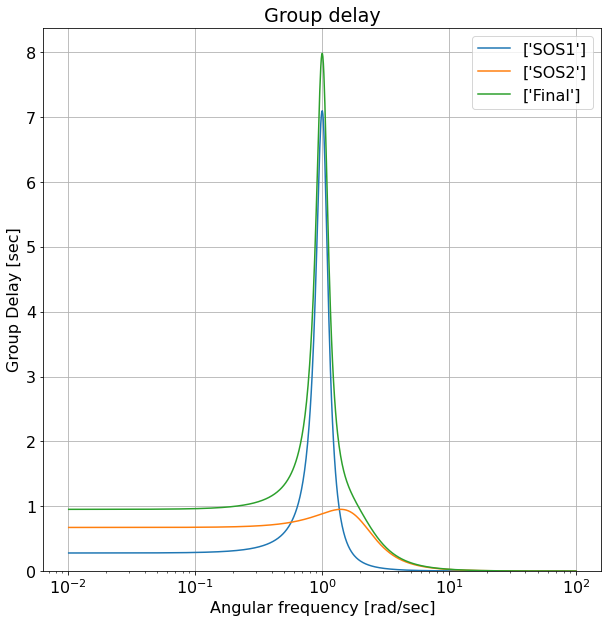

In [5]:
from splane import analyze_sys, pretty_print_bicuad_omegayq
# Comienzo Ejercicio
num1 = np.array([0.892, 0, 0])
den1 = np.array([1, 0.283, 1.014])
num2 = np.array([1, 0, 0])
den2 = np.array([1, 2.412, 3.584])

num1_aux = np.polymul(num1,num2)
den1_aux = np.polymul(den1,den2)

sos_1 = sig.TransferFunction(num1,den1)
sos_2 = sig.TransferFunction(num2,den2)
sos_1_aux = sig.TransferFunction(num1_aux,den1_aux)

all_sos = [sos_1, sos_2, sos_1_aux]

pretty_print_bicuad_omegayq(num1,den1)
pretty_print_bicuad_omegayq(num2,den2)

plt.close('all')
analyze_sys(all_sos, sys_name=['SOS1','SOS2','Final'])